In [1]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name()}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory // 1024**2} MB")
else:
    print("GPU not available - check Runtime > Change runtime type > Hardware accelerator > GPU")

!pip install ultralytics -q

from ultralytics import YOLO
import os
from pathlib import Path
import yaml

PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4
CUDA version: 12.4
GPU Memory: 15095 MB


In [2]:
from google.colab import files
import zipfile
import shutil

print("Upload your smartwatch dataset...")
print("Options:")
print("1. Upload one ZIP cu train/, valid/, test/, data.yaml")
print("2. Or upload manual each folder")

print("\nUpload ZIP file cu smartwatch dataset-ul:")
uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('.')
        os.remove(filename)
        print("Dataset extracted!")

def check_dataset_structure():
    required_paths = [
        'train/images', 'train/labels',
        'valid/images', 'valid/labels',
        'test/images', 'test/labels',
        'data.yaml'
    ]

    missing = []
    for path in required_paths:
        if not os.path.exists(path):
            missing.append(path)

    if missing:
        print(f"Missing: {missing}")
        return False
    else:
        print("Dataset structure is correct!")
        return True

check_dataset_structure()

Upload your smartwatch dataset...
Options:
1. Upload one ZIP cu train/, valid/, test/, data.yaml
2. Or upload manual each folder

Upload ZIP file cu smartwatch dataset-ul:


Saving Smart watch.v1i.yolov8.zip to Smart watch.v1i.yolov8.zip
Extracting Smart watch.v1i.yolov8.zip...
Dataset extracted!
Dataset structure is correct!


True

In [3]:
def analyze_dataset():
    # Count files
    train_imgs = len(list(Path('train/images').glob('*')))
    train_lbls = len(list(Path('train/labels').glob('*')))

    valid_imgs = len(list(Path('valid/images').glob('*')))
    valid_lbls = len(list(Path('valid/labels').glob('*')))

    test_imgs = len(list(Path('test/images').glob('*')))
    test_lbls = len(list(Path('test/labels').glob('*')))

    print("📊 Dataset Statistics:")
    print(f"Train: {train_imgs} images, {train_lbls} labels")
    print(f"Valid: {valid_imgs} images, {valid_lbls} labels")
    print(f"Test: {test_imgs} images, {test_lbls} labels")
    print(f"Total: {train_imgs + valid_imgs + test_imgs} images")

    # Check data.yaml
    with open('data.yaml', 'r') as f:
        data_config = yaml.safe_load(f)

    print(f"\nClasses: {data_config['names']}")
    print(f"Number of classes: {data_config['nc']}")

    sample_labels = list(Path('train/labels').glob('*.txt'))[:3]
    print(f"\nSample labels:")
    for label_file in sample_labels:
        print(f"  {label_file.name}:")
        with open(label_file, 'r') as f:
            content = f.read().strip()
            if content:
                print(f"    {content}")
            else:
                print("    (empty)")

    return train_imgs > 0

analyze_dataset()

📊 Dataset Statistics:
Train: 316 images, 316 labels
Valid: 90 images, 90 labels
Test: 46 images, 46 labels
Total: 452 images

Classes: ['smart watch']
Number of classes: 1

Sample labels:
  smartwatch-with-round-dial108_jpg.rf.03598201f08eae7ced3733ee13fa545f.txt:
    0 0.45305164319248825 0.3961864406779661 0.7183098591549296 0.7923728813559322
  smartwatch-with-round-dial257_jpg.rf.fca07905ca7a5f6acf098beb5d8fb75b.txt:
    0 0.48063380281690143 0.4887005649717514 0.27816901408450706 0.7401129943502824
0 0.7746478873239436 0.5225988700564972 0.22535211267605634 0.6610169491525424
0 0.1813380281690141 0.5423728813559322 0.2640845070422535 0.7005649717514124
  smartwatch-with-round-dial199_jpg.rf.c0823f9529ba5d8564699b31eab6ca71.txt:
    0 0.38 0.48 0.40444444444444444 0.5955555555555555


True

In [4]:
from ultralytics import YOLO
import torch

config = {
    'data': 'data.yaml',
    'epochs': 100,
    'batch': 32,
    'imgsz': 640,
    'device': 0,
    'project': 'smartwatch_detection',  # Doar numele schimbat
    'name': 'colab_v1',
    'patience': 20,
    'save_period': 10,
    'workers': 2,
}

print("Starting YOLO training on Colab...")
print(f"Configuration: {config}")

# Load pre-trained model
model = YOLO('yolov8n.pt')

# Start training
results = model.train(
    data=config['data'],
    epochs=config['epochs'],
    batch=config['batch'],
    imgsz=config['imgsz'],
    device=config['device'],
    project=config['project'],
    name=config['name'],
    patience=config['patience'],
    save_period=config['save_period'],
    workers=config['workers'],

    # Enhanced data augmentation
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=15.0,
    translate=0.1,
    scale=0.9,
    shear=2.0,
    perspective=0.0,
    flipud=0.0,
    fliplr=0.5,
    mixup=0.2,
    copy_paste=0.3,

    # Optimizer settings
    optimizer='AdamW',
    lr0=0.01,
    lrf=0.1,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,

    # Colab specific
    cache=True,
    rect=True,
    cos_lr=True,
    close_mosaic=10,
)

print("Training completed!")
print(f"Best model: {config['project']}/{config['name']}/weights/best.pt")

Starting YOLO training on Colab...
Configuration: {'data': 'data.yaml', 'epochs': 100, 'batch': 32, 'imgsz': 640, 'device': 0, 'project': 'smartwatch_detection', 'name': 'colab_v1', 'patience': 20, 'save_period': 10, 'workers': 2}
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.3, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=15.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.p

train: Scanning /content/train/labels... 316 images, 0 backgrounds, 0 corrupt: 100%|██████████| 316/316 [00:00<00:00, 2380.95it/s]

train: New cache created: /content/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 388. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.3GB RAM): 100%|██████████| 316/316 [00:01<00:00, 286.65it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 332.5±107.0 MB/s, size: 12.0 KB)


val: Scanning /content/valid/labels... 90 images, 0 backgrounds, 0 corrupt: 100%|██████████| 90/90 [00:00<00:00, 1213.29it/s]

val: New cache created: /content/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 90/90 [00:00<00:00, 145.17it/s]


Plotting labels to smartwatch_detection/colab_v1/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to smartwatch_detection/colab_v1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.85G      2.012      3.417      2.469         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         90        117    0.00311      0.718     0.0807     0.0234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.79G      1.928      2.452      2.485         29        544: 100%|██████████| 10/10 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         90        117    0.00668      0.479    0.00656    0.00143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.81G      1.931      2.133      2.494         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         90        117    0.00319      0.427    0.00208   0.000741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.83G      1.994      2.234      2.665         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         90        117   0.000333     0.0769   0.000237   8.57e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.84G      2.049      2.137      2.716         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         90        117    3.7e-05    0.00855   1.87e-05   1.87e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.87G      1.969      2.084      2.561         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         90        117          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.89G      2.013      1.996      2.594         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         90        117          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       4.9G      1.896      1.983      2.551         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]


                   all         90        117     0.0071       0.65    0.00641    0.00212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.92G      1.904      1.902      2.474         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         90        117    0.00308      0.684    0.00277    0.00102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.94G      1.863      1.828      2.426         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         90        117    0.00188      0.427    0.00143   0.000572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.96G      1.823      1.762      2.377         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         90        117   0.000409      0.094   0.000245   7.03e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.97G      1.755      1.785       2.34         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         90        117   0.000379     0.0855    0.00021   6.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.99G      1.757      1.729      2.306         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         90        117     0.0225      0.274     0.0173    0.00519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.01G      1.753      1.738      2.314         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         90        117      0.011      0.615    0.00956    0.00281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.03G      1.791      1.634      2.302         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         90        117        0.2     0.0256     0.0291    0.00702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.04G      1.732      1.657      2.321         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         90        117      0.241      0.162     0.0982     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.06G       1.72      1.609      2.283         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         90        117      0.154      0.326      0.122     0.0314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.08G      1.712      1.638      2.268         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         90        117      0.173      0.179     0.0812     0.0215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.09G      1.709      1.595      2.217         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         90        117      0.104      0.154     0.0579     0.0138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.11G      1.645      1.542      2.207         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         90        117      0.155      0.175     0.0829     0.0225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.13G      1.624      1.549        2.2         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]


                   all         90        117      0.258      0.291      0.199     0.0621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.14G      1.658      1.553       2.16         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         90        117      0.478       0.41       0.32      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.16G      1.586      1.518      2.123         29        544: 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         90        117       0.37      0.368      0.285     0.0755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.18G      1.575      1.454      2.148         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         90        117      0.549      0.396      0.404      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       5.2G      1.584      1.542      2.147         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         90        117      0.313      0.239      0.181     0.0577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.21G      1.548      1.428      2.113         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         90        117      0.578       0.35      0.345     0.0979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.23G      1.629      1.427       2.21         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         90        117      0.215      0.205      0.138     0.0376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.25G      1.599       1.44      2.143         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


                   all         90        117      0.304      0.487      0.286     0.0876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.26G      1.582      1.384      2.099         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         90        117      0.257      0.367      0.204     0.0578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.28G      1.561      1.416      2.095         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         90        117      0.411      0.444      0.348      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       5.3G      1.588       1.39      2.144         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         90        117      0.402      0.308      0.277     0.0739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.32G      1.559      1.381      2.138         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         90        117      0.499      0.436      0.418      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.33G      1.522      1.343      2.086         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         90        117       0.66      0.548      0.556      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.35G      1.509      1.271      2.066         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]


                   all         90        117      0.311      0.313      0.187     0.0515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.37G      1.528      1.376      2.092         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         90        117      0.393      0.496      0.353      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.38G       1.46      1.321      2.019         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         90        117      0.555      0.487      0.429      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       5.4G       1.45      1.279      1.956         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]


                   all         90        117      0.723      0.487      0.544       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.42G      1.484      1.221      2.003         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         90        117      0.722      0.521       0.56      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.43G      1.475      1.209      2.004         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         90        117      0.642      0.567      0.532      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.45G      1.559      1.228      2.079         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         90        117      0.586      0.513      0.517      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.47G      1.474      1.283      2.009         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         90        117      0.649      0.504      0.506      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.49G      1.467      1.277      2.024         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         90        117      0.549      0.513      0.517      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       5.5G      1.426      1.197      1.959         29        544: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         90        117      0.657      0.513      0.554      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.52G      1.398      1.211      1.938         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         90        117      0.468      0.393      0.381        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.54G       1.41      1.119      1.939         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         90        117      0.631      0.438      0.502      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.55G      1.416      1.074      1.903         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         90        117      0.581      0.419      0.505      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.57G      1.441      1.112      1.937         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         90        117      0.714      0.598      0.574      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.59G      1.365      1.064      1.875         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         90        117      0.614      0.547      0.485      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.61G      1.378      1.071      1.886         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         90        117      0.701       0.53      0.574      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.62G      1.367      1.062      1.846         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         90        117      0.645       0.59      0.581      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.64G      1.351      1.087      1.882         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         90        117      0.762      0.521      0.571      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.66G      1.377      1.052      1.888         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         90        117      0.715      0.578      0.626      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.67G      1.366      1.083      1.873         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         90        117      0.658       0.56      0.541      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.69G      1.406      1.107      1.896         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         90        117      0.655       0.59       0.51      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.71G      1.447      1.148      1.933         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         90        117      0.743      0.544      0.553      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.73G       1.39      1.125       1.93         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         90        117      0.702      0.462      0.531      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.74G      1.364      1.122      1.863         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

                   all         90        117      0.674      0.521      0.545      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.76G      1.388      1.112      1.894         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         90        117      0.691      0.504      0.539      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.78G       1.29      1.004      1.835         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]

                   all         90        117      0.737       0.53      0.575      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.79G      1.357      1.041      1.872         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         90        117      0.651      0.624      0.626      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.81G      1.366       1.03      1.847         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         90        117      0.653      0.547      0.566      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.83G      1.371      1.074      1.858         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         90        117      0.687       0.59      0.617      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.84G      1.324     0.9686       1.83         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         90        117      0.707      0.607      0.626      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.86G      1.325     0.9771      1.848         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         90        117      0.706       0.59      0.629      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.88G      1.323     0.9797      1.842         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         90        117       0.68        0.6      0.614      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.89G      1.282     0.9608      1.787         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         90        117      0.746      0.607      0.599      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.91G      1.387      1.048      1.837         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         90        117      0.747       0.65      0.602      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.93G      1.293     0.9783      1.812         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         90        117      0.708       0.58      0.544      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.95G      1.335      1.009      1.816         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         90        117      0.785       0.59      0.609      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.96G      1.284     0.9326      1.801         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         90        117      0.745      0.607      0.616      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.98G      1.303     0.9778      1.786         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         90        117      0.741       0.59      0.616      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         6G      1.267     0.9582      1.766         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         90        117      0.818      0.615      0.659      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.01G      1.264     0.9482      1.758         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         90        117       0.77      0.602       0.64      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.03G      1.265     0.9422      1.747         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         90        117      0.782       0.59      0.633      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.05G      1.259     0.9054      1.786         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         90        117       0.75      0.564      0.634      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.07G      1.265     0.9299      1.755         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         90        117      0.772       0.58      0.616      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.08G      1.253     0.8871      1.742         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         90        117      0.757      0.612      0.646      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       6.1G      1.275     0.9152      1.781         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         90        117      0.789      0.573      0.636      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.12G      1.237     0.8901      1.742         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         90        117      0.792      0.588      0.638      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.13G      1.247     0.8913      1.746         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         90        117      0.804       0.59      0.626      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.15G      1.231     0.8929      1.717         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         90        117      0.816      0.598      0.645      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.17G      1.231      0.878       1.71         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         90        117        0.8      0.581      0.654      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.19G      1.223     0.8691      1.751         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         90        117      0.821      0.547      0.644      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       6.2G      1.197     0.8595      1.701         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         90        117      0.732      0.631      0.641      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.22G      1.197     0.8709      1.713         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         90        117      0.779      0.607      0.645      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.24G      1.209     0.8801      1.715         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         90        117      0.797      0.605      0.685      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.25G      1.202      0.855      1.715         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         90        117      0.805      0.598      0.677      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.27G      1.163     0.8346      1.678         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         90        117      0.785       0.59      0.669      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.29G      1.187     0.8446      1.677         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         90        117      0.771      0.604      0.643      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       6.3G      1.167     0.8194      1.675         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         90        117      0.803      0.624       0.64      0.291


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.32G      1.247     0.8179      1.735         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         90        117      0.802      0.607      0.652      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.34G      1.226     0.8275      1.732         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         90        117      0.799      0.581      0.647      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.36G      1.236     0.8525      1.703         30        544: 100%|██████████| 10/10 [00:04<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         90        117      0.774      0.573      0.639       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.37G      1.239     0.8667      1.739         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.28it/s]

                   all         90        117      0.711      0.598      0.611      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.39G       1.21     0.8431      1.701         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         90        117      0.763      0.598      0.618      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.41G      1.197     0.8651      1.681         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         90        117      0.748      0.598      0.636       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.42G      1.196     0.8247      1.683         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


                   all         90        117      0.789      0.574      0.636       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.44G      1.176     0.8637      1.652         30        544: 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         90        117      0.693      0.598      0.605      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.46G      1.189     0.8268      1.699         30        544: 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         90        117      0.698      0.594      0.614      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.48G      1.189     0.8241       1.66         30        544: 100%|██████████| 10/10 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         90        117      0.815      0.528      0.617      0.297



100 epochs completed in 0.129 hours.
Optimizer stripped from smartwatch_detection/colab_v1/weights/last.pt, 6.3MB
Optimizer stripped from smartwatch_detection/colab_v1/weights/best.pt, 6.3MB

Validating smartwatch_detection/colab_v1/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]


                   all         90        117      0.805      0.598      0.675      0.302
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to smartwatch_detection/colab_v1
Training completed!
Best model: smartwatch_detection/colab_v1/weights/best.pt


In [5]:
# Validare pe test set
print("Validating model...")

# Load best model
best_model = YOLO('smartwatch_detection/colab_v1/weights/best.pt')

# Validate on test set
test_results = best_model.val(
    data='data.yaml',
    split='test',
    save_json=True,
    conf=0.25,
    iou=0.6,
)

print("Test Results:")
print(f"  mAP50: {test_results.box.map50:.3f}")
print(f"  mAP50-95: {test_results.box.map:.3f}")
print(f"  Precision: {test_results.box.mp:.3f}")
print(f"  Recall: {test_results.box.mr:.3f}")

test_images = list(Path('test/images').glob('*'))[:5]

print(f"\n🔍 Testing on {len(test_images)} sample images:")

for img_path in test_images:
    print(f"\nTesting: {img_path.name}")

    # Run inference
    results = best_model(str(img_path), conf=0.3, save=True)

    # Print results
    if len(results[0].boxes) > 0:
        for box in results[0].boxes:
            conf = box.conf[0].item()
            cls = int(box.cls[0].item())
            print(f"  Detected smartwatch: {conf:.3f} confidence")
    else:
        print(f"  No smartwatch detected")

Validating model...
Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 295.9±215.3 MB/s, size: 10.8 KB)


val: Scanning /content/test/labels... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<00:00, 1069.20it/s]

val: New cache created: /content/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


                   all         46         58      0.816      0.724      0.814      0.502
Speed: 7.7ms preprocess, 18.6ms inference, 0.0ms loss, 3.3ms postprocess per image
Saving runs/detect/val5/predictions.json...
Results saved to runs/detect/val5
Test Results:
  mAP50: 0.814
  mAP50-95: 0.502
  Precision: 0.816
  Recall: 0.724

🔍 Testing on 5 sample images:

Testing: smartwatch-with-round-dial88_jpg.rf.b8a31c77d0207ce5a075bcfe2327ae09.jpg

image 1/1 /content/test/images/smartwatch-with-round-dial88_jpg.rf.b8a31c77d0207ce5a075bcfe2327ae09.jpg: 640x640 4 smart watchs, 7.4ms
Speed: 3.4ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
  Detected smartwatch: 0.770 confidence
  Detected smartwatch: 0.744 confidence
  Detected smartwatch: 0.705 confidence
  Detected smartwatch: 0.691 confidence

Testing: smart-watch-images-with-strap372_jpg.rf.4dd4dfc78d70ccec042e7ee1adcf36b1.jpg

image 1/1 /content/test/images/smart

📈 Training Results:


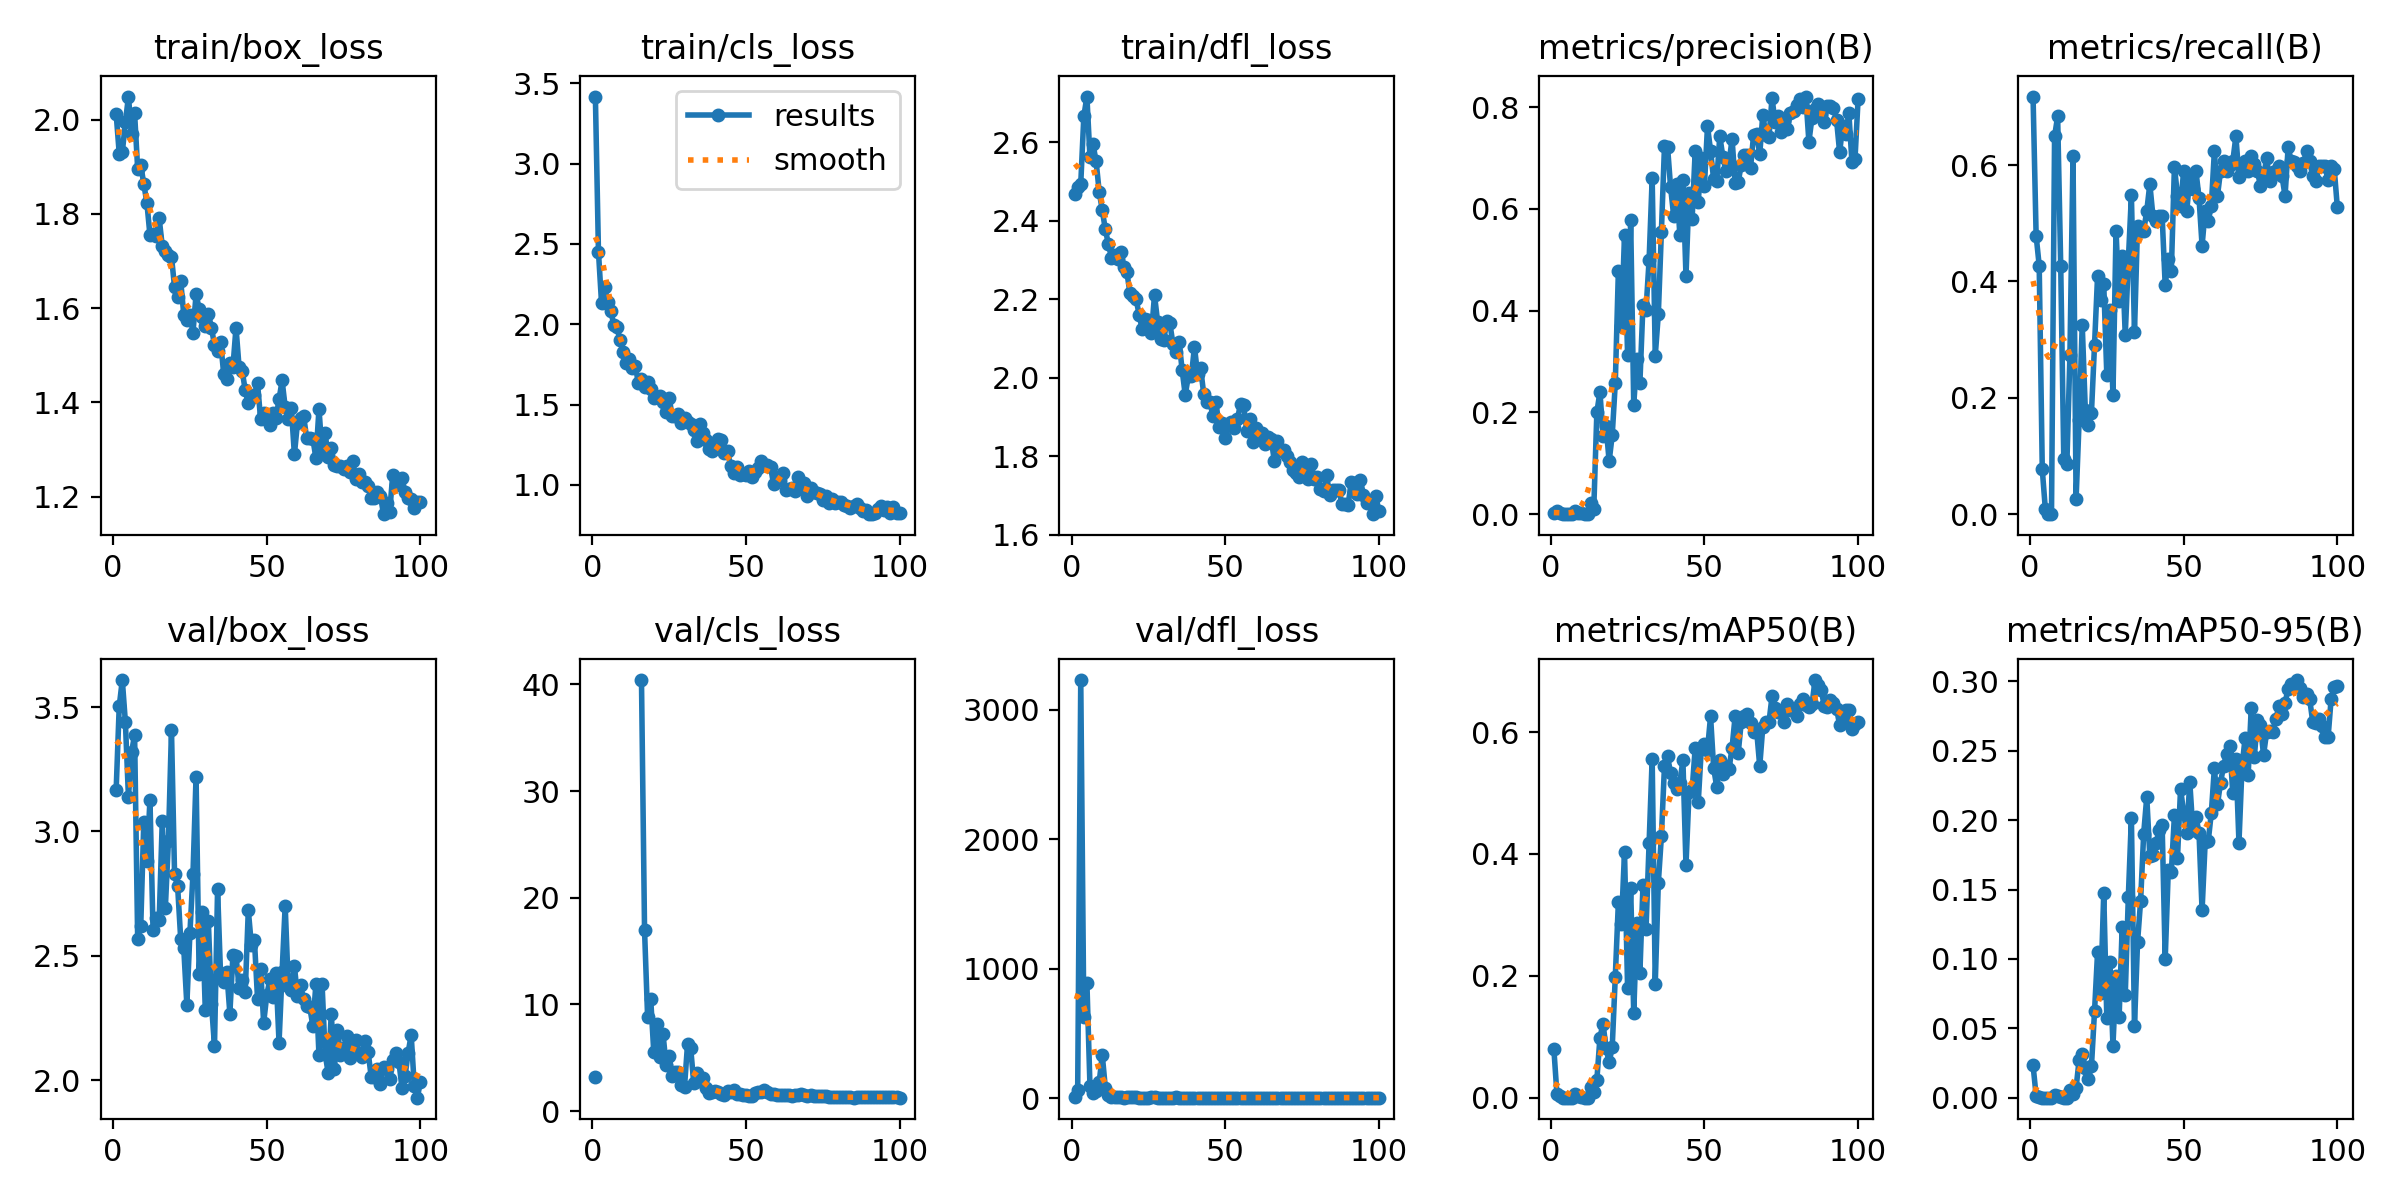


🎯 Confusion Matrix:


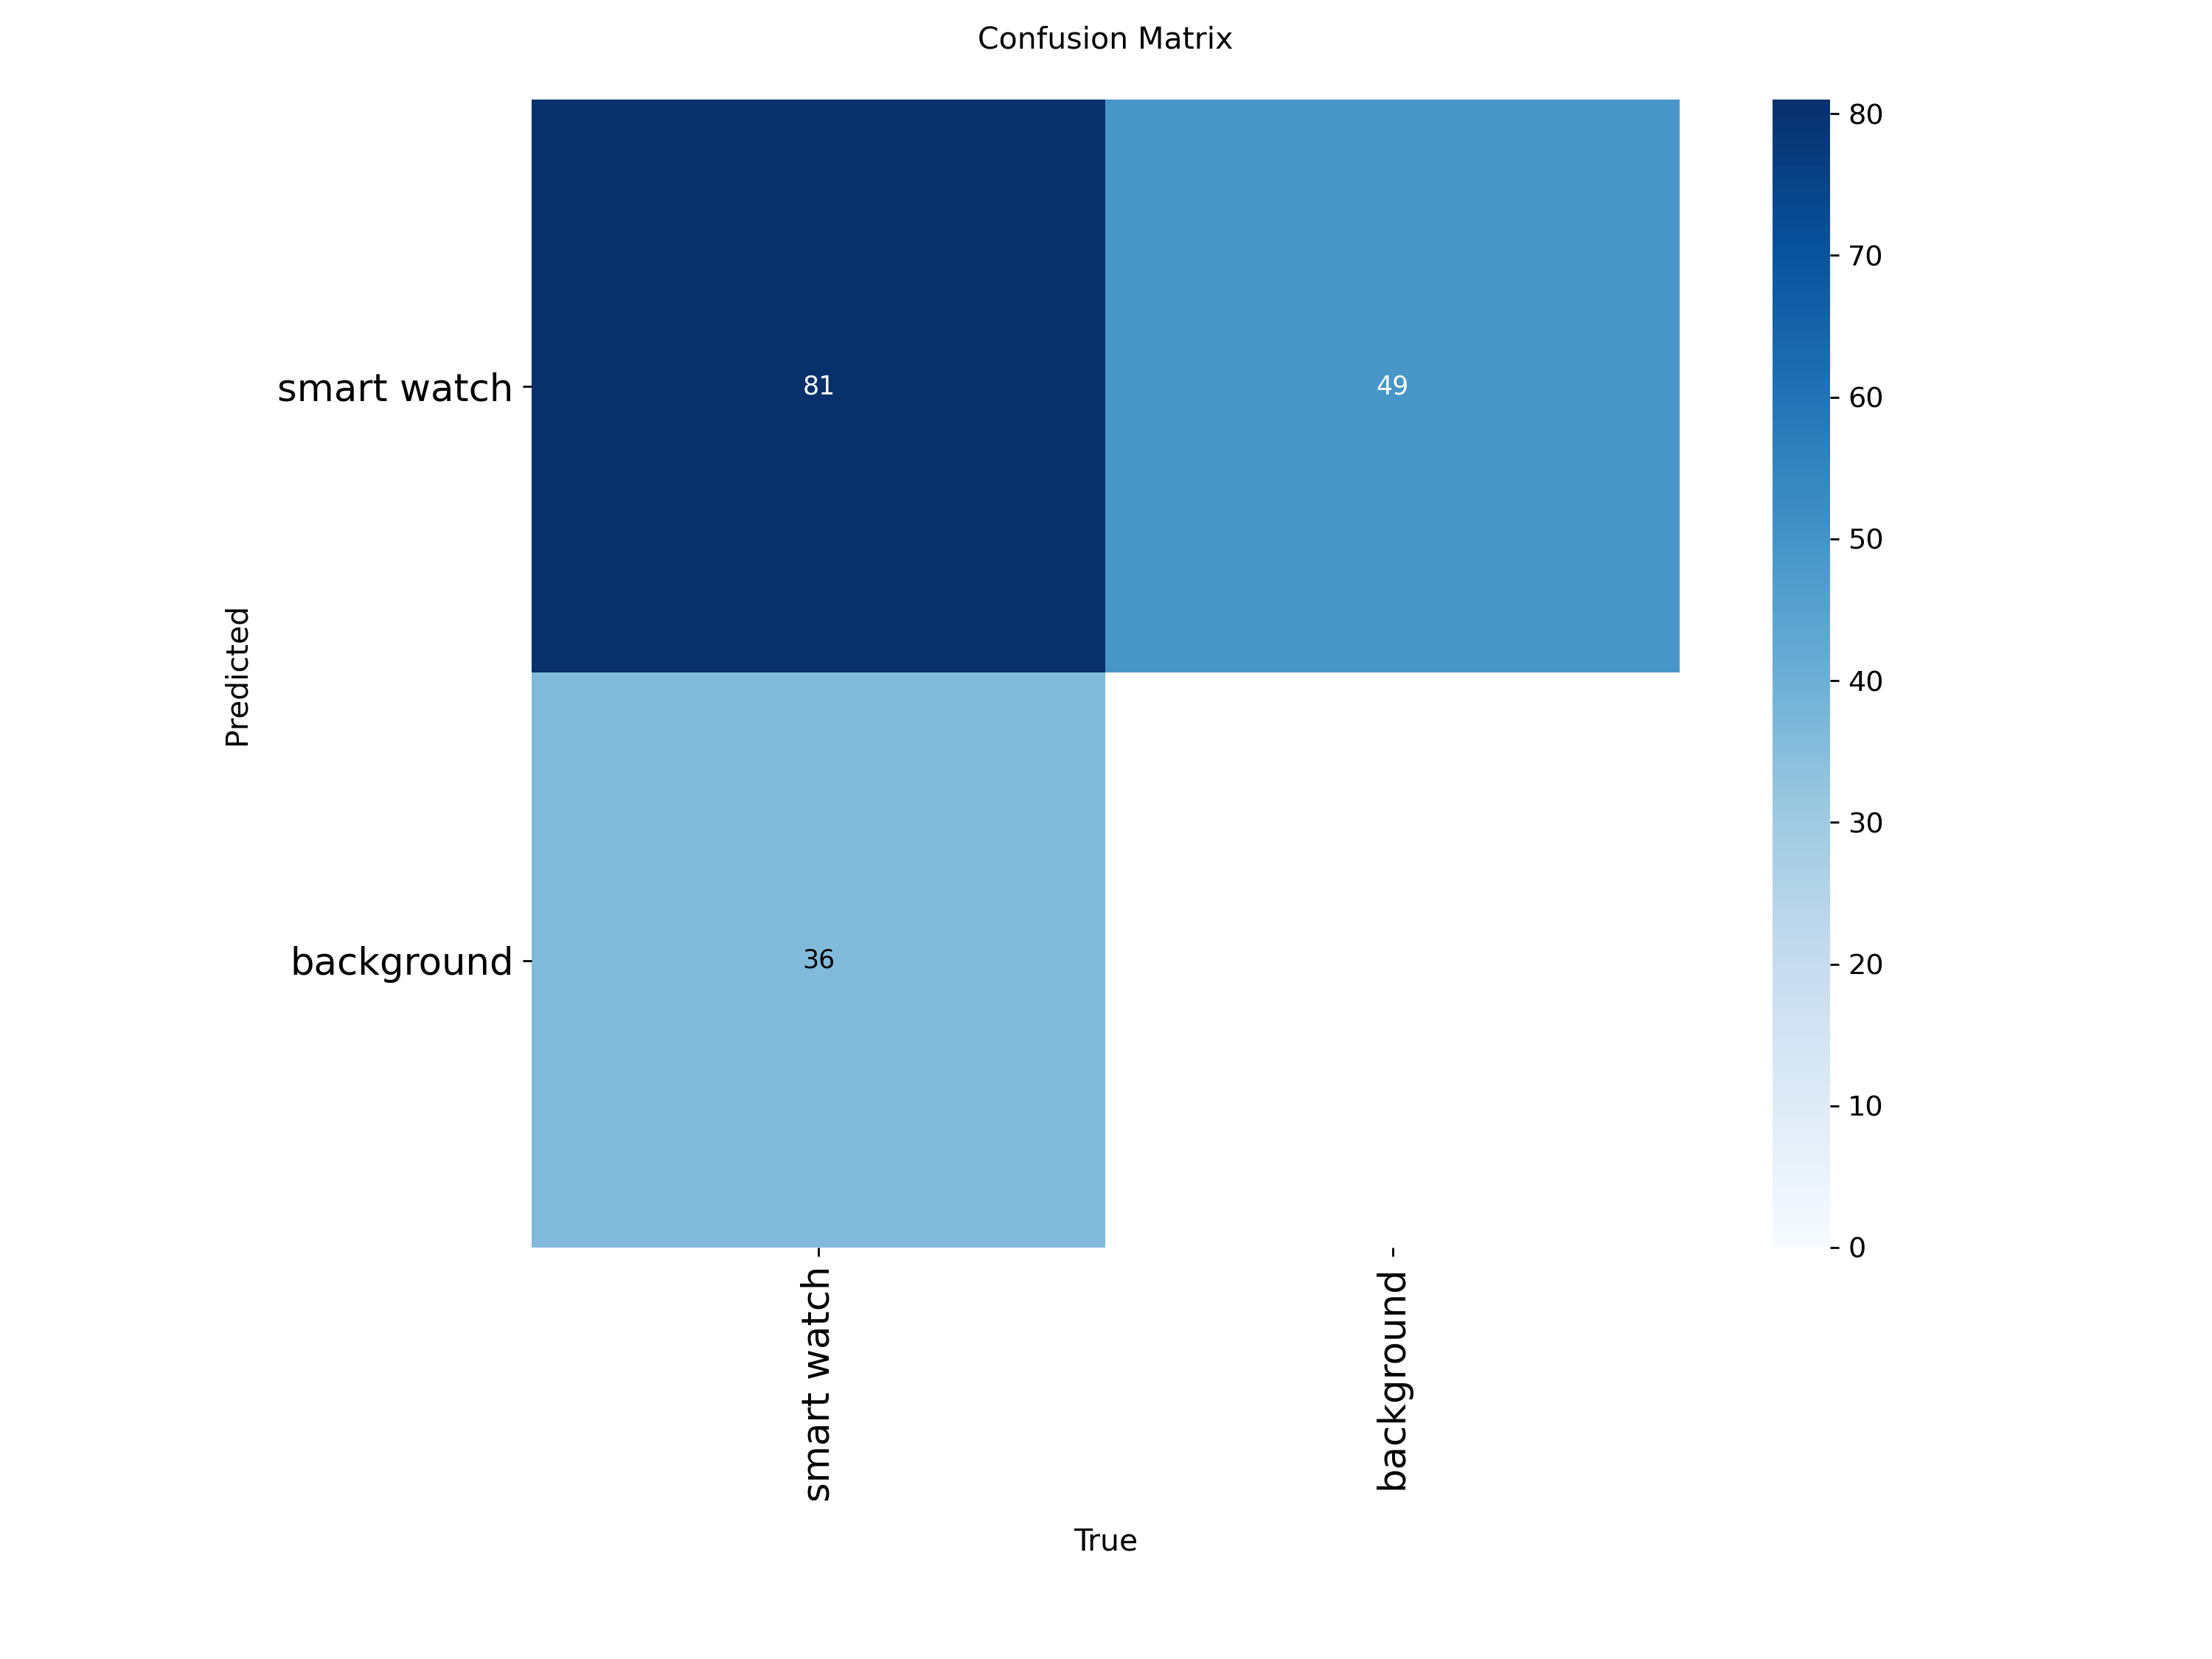


🔍 Sample Predictions:


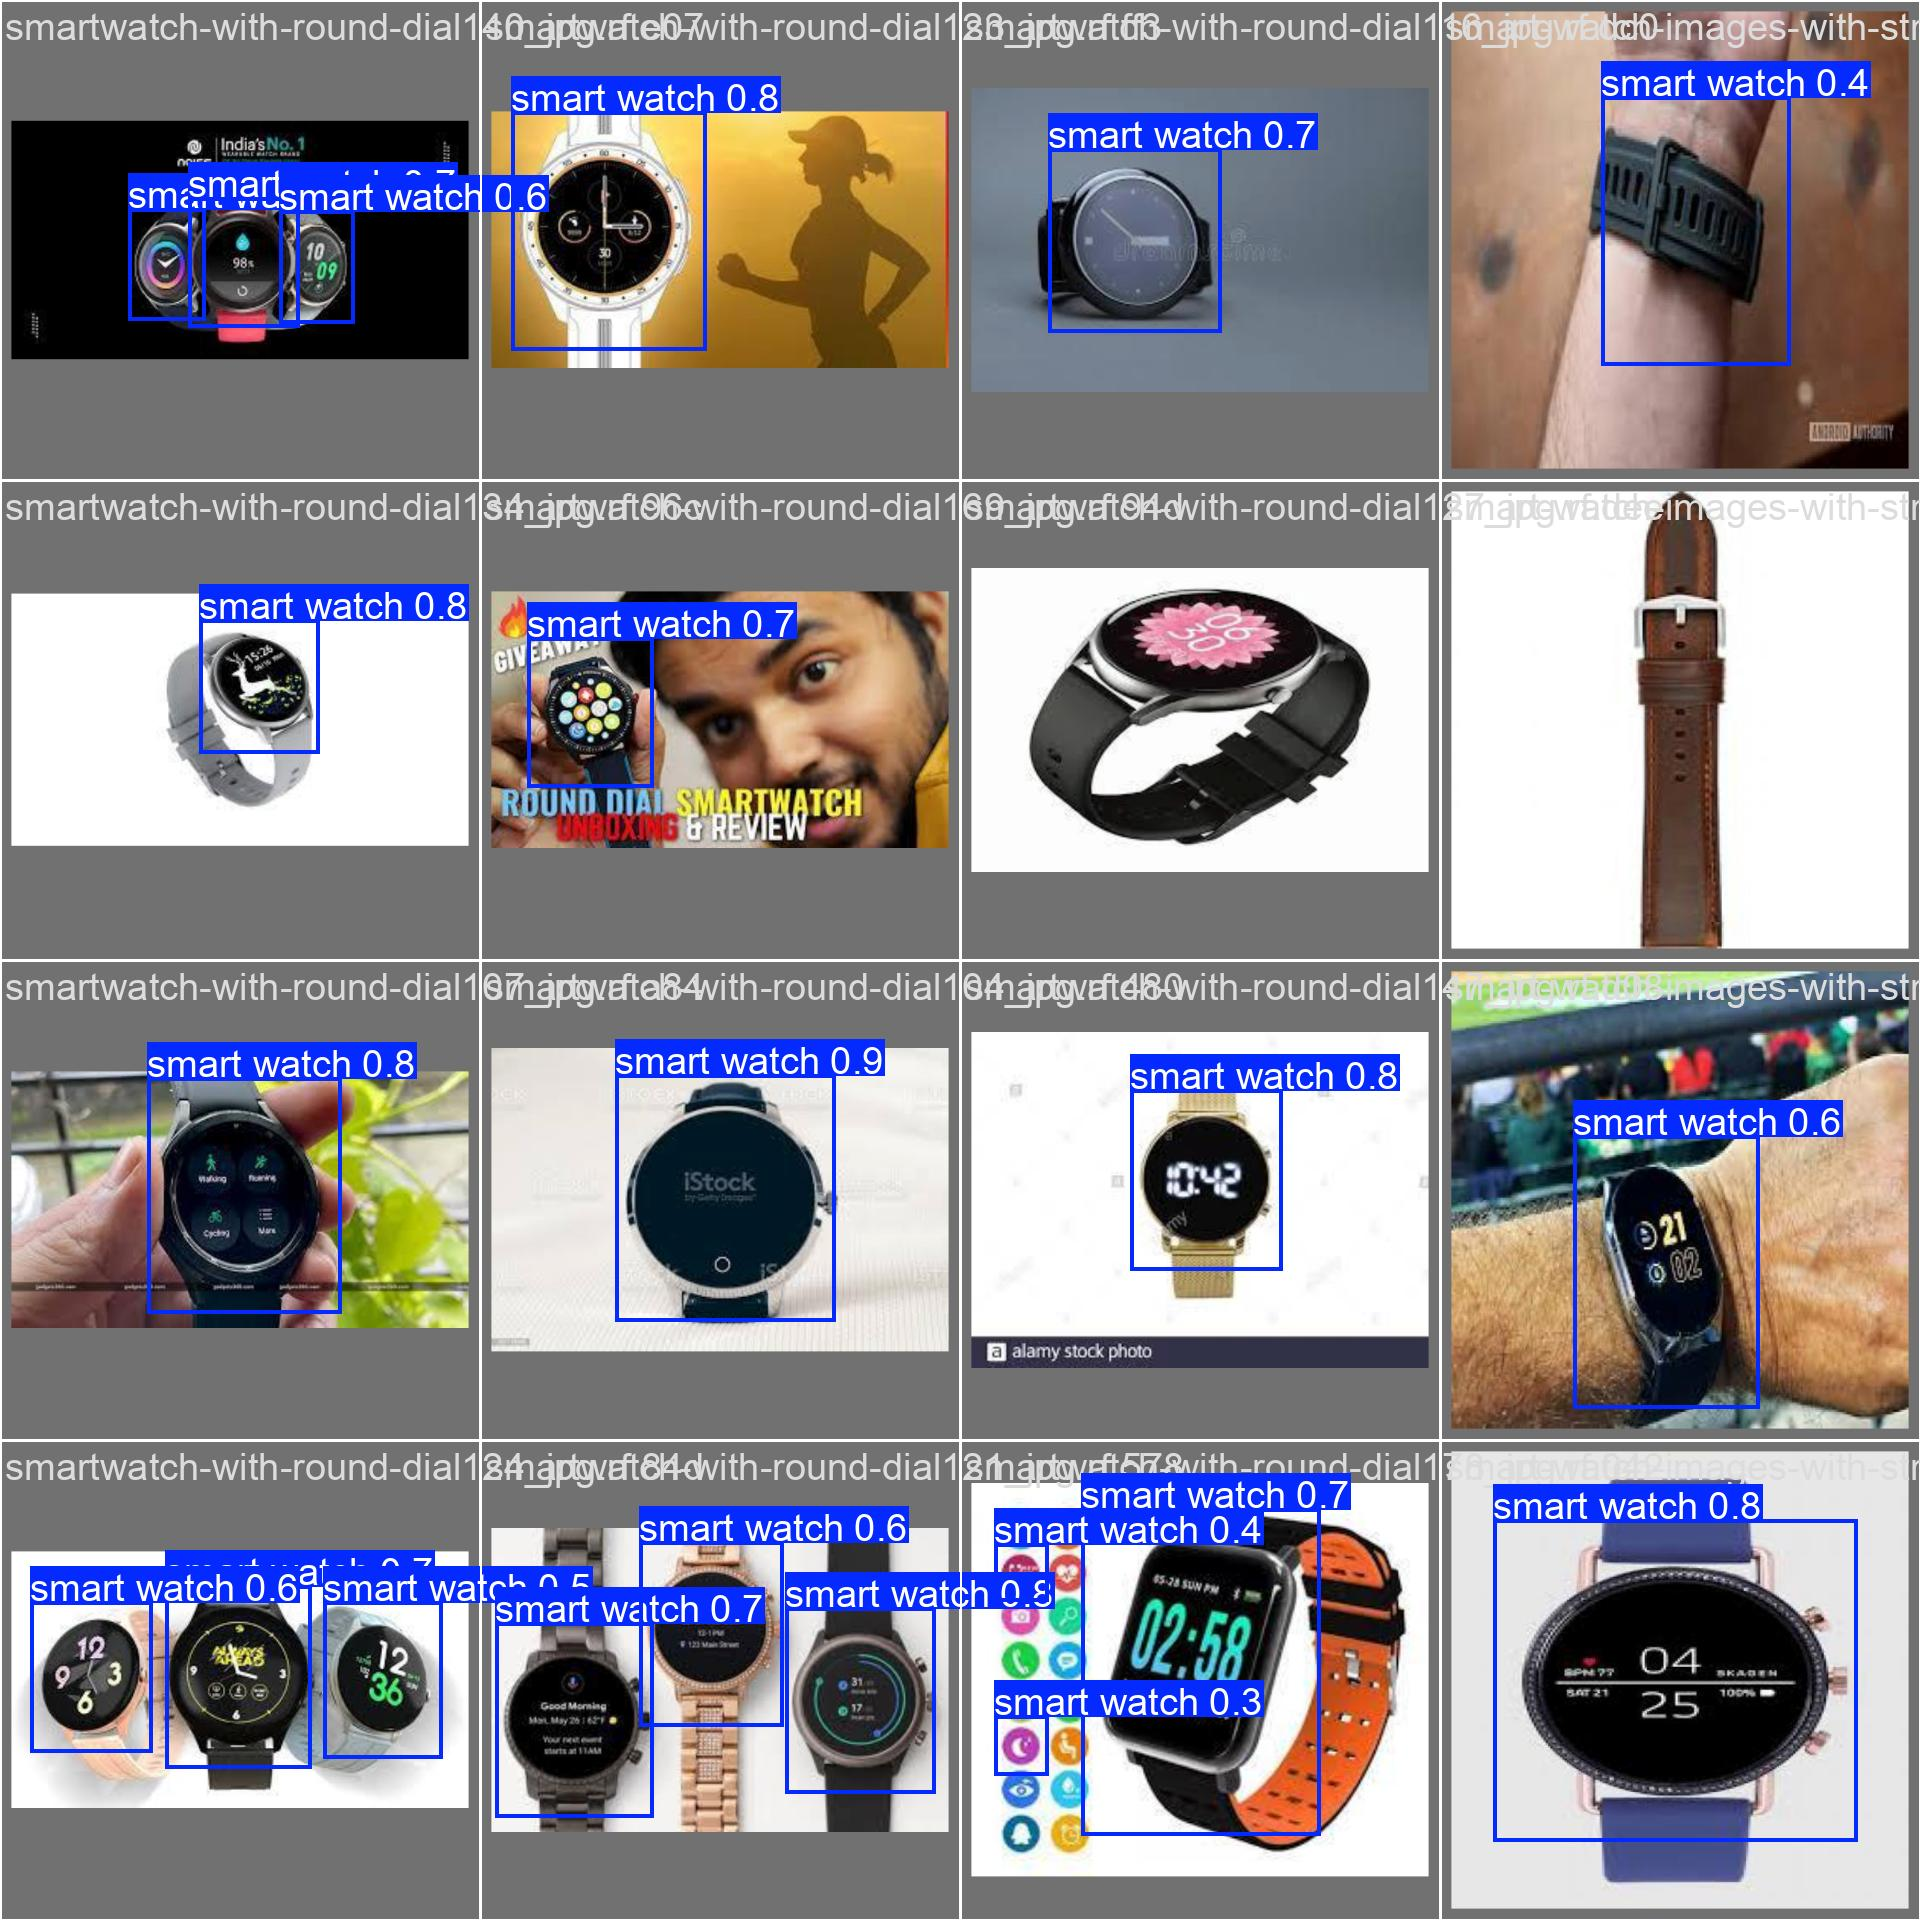

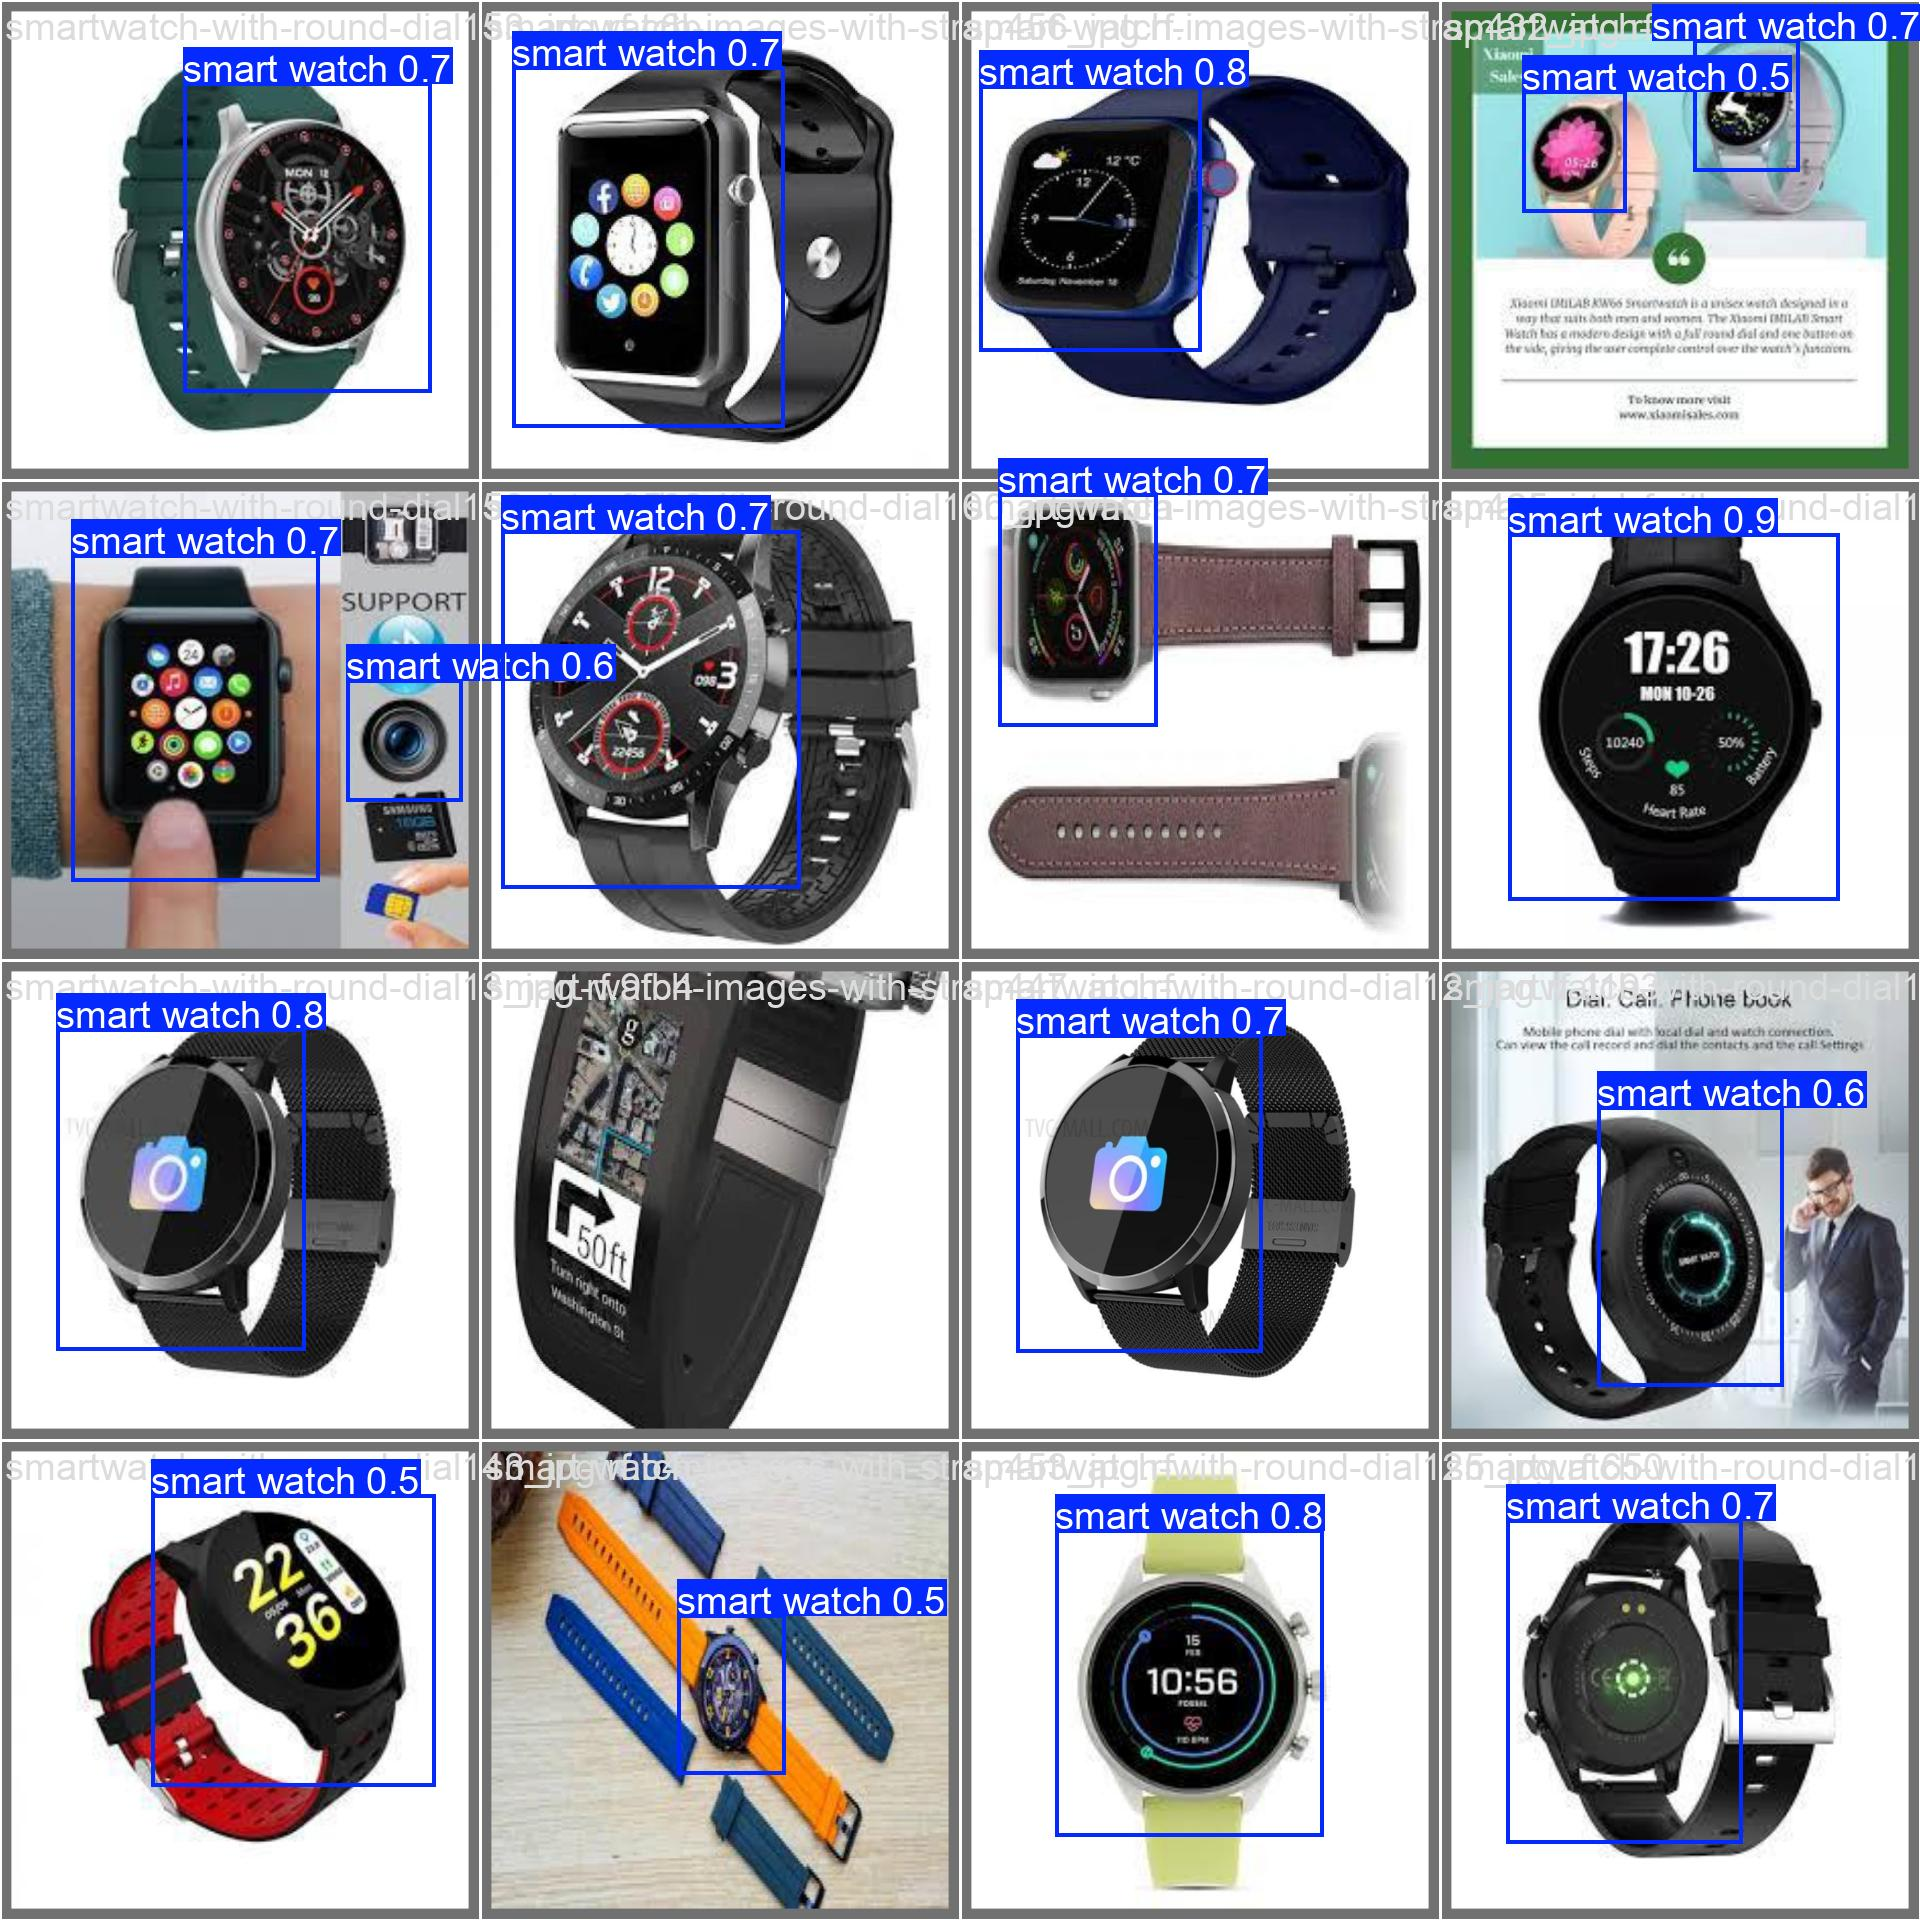

In [6]:
# Vizualizare training curves și rezultate
import matplotlib.pyplot as plt
from IPython.display import Image, display
import glob

# Training curves
results_dir = 'smartwatch_detection/colab_v1'

# Afișează rezultatele
if os.path.exists(f'{results_dir}/results.png'):
    print("📈 Training Results:")
    display(Image(f'{results_dir}/results.png'))

# Confusion matrix
if os.path.exists(f'{results_dir}/confusion_matrix.png'):
    print("\n🎯 Confusion Matrix:")
    display(Image(f'{results_dir}/confusion_matrix.png'))

# Sample predictions
pred_images = glob.glob(f'{results_dir}/val_batch*_pred.jpg')
if pred_images:
    print(f"\n🔍 Sample Predictions:")
    for img_path in pred_images[:2]:
        display(Image(img_path))

In [7]:
from google.colab import files
import shutil

shutil.make_archive('smartwatch_model', 'zip', 'smartwatch_detection/colab_v1')

print("Downloading trained model and results...")

files.download('smartwatch_model.zip')

files.download('smartwatch_detection/colab_v1/weights/best.pt')

print("Download complete!")
print("Files downloaded:")
print("  - smartwatch_model.zip (complete results)")
print("  - best.pt (trained model)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download complete!
Files downloaded:
  - smartwatch_model.zip (complete results)
  - best.pt (trained model)
